In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [137]:
data= pd.read_csv(r"C:\Users\soumitra\Desktop\DS\Projects\Loan Default Prediction Model\Dataset\Loan_default.csv")
df= data.copy()
pd.options.display.max_columns
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [138]:
df.drop(columns=["LoanID"], inplace=True)

In [139]:
df.shape

(255347, 17)

In [140]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [142]:
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [143]:
df.duplicated().sum()

np.int64(0)

# Checking distribution of Target column

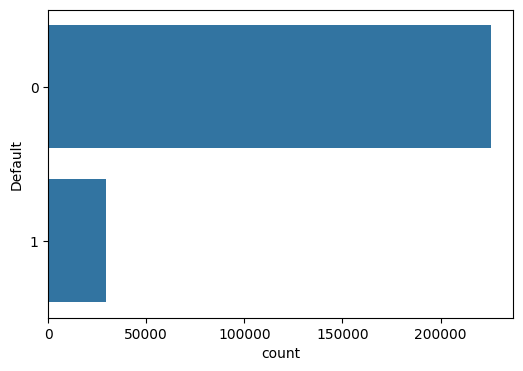

In [144]:
plt.figure(figsize=(6,4))
sns.countplot(df, y="Default")
plt.show()
# defaulted (1), not (0)

We can observe that target column is biased towards not defaulted for that we have to use sampling technique to reduce the biasness 

# Numeric columns

In [145]:
numeric_cols_df= df.select_dtypes(include=np.number)
numeric_cols_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0


# Categorical columns

In [146]:
non_num_cols= []
for cols in df.columns:
    if cols not in numeric_cols_df:
        non_num_cols.append(f'"{cols}"')

print(', '.join(non_num_cols))

"Education", "EmploymentType", "MaritalStatus", "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"


In [147]:
categ_cols_df= df[["Education","EmploymentType","MaritalStatus","HasMortgage","HasDependents","LoanPurpose","HasCoSigner"]]
categ_cols_df.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


# Exploratory Data Analysis (EDA)

For categorical columns

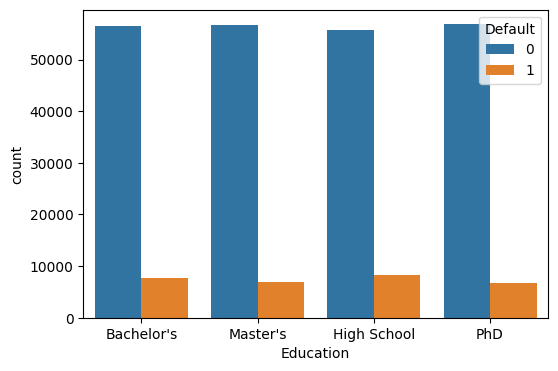

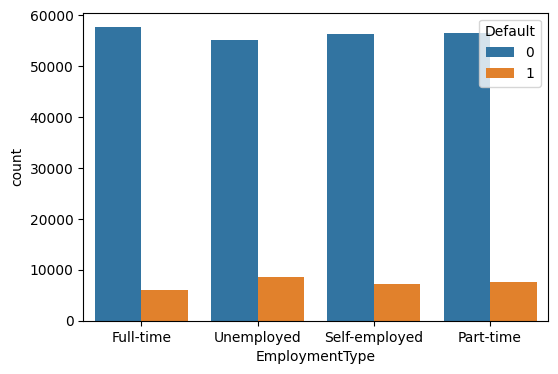

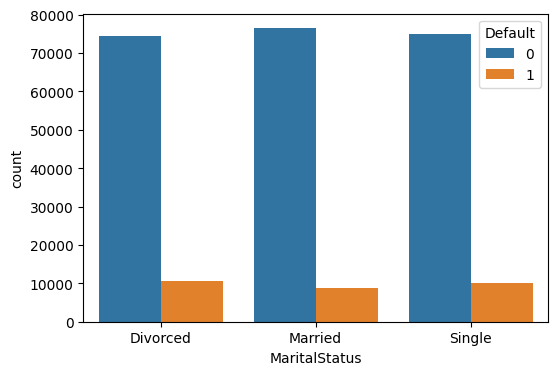

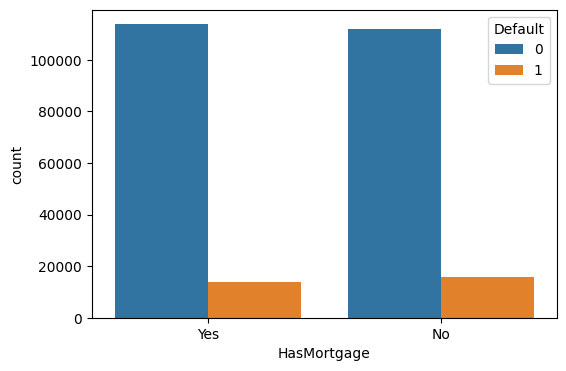

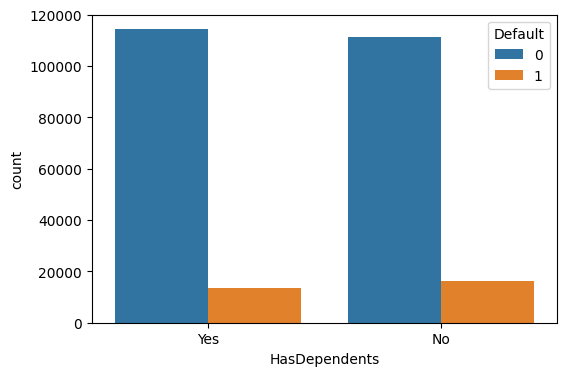

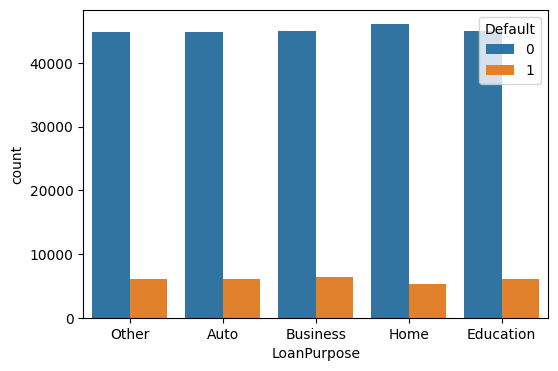

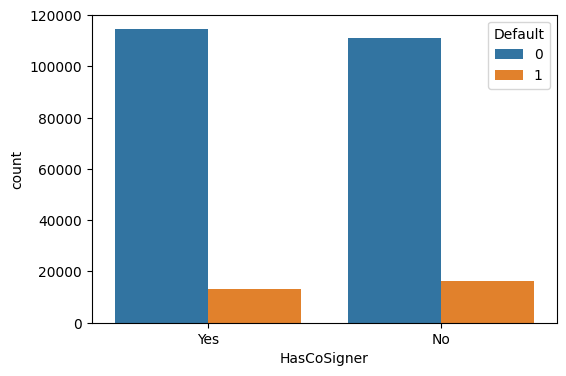

In [148]:
for cols in categ_cols_df:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[cols], hue=df["Default"])
    plt.show()

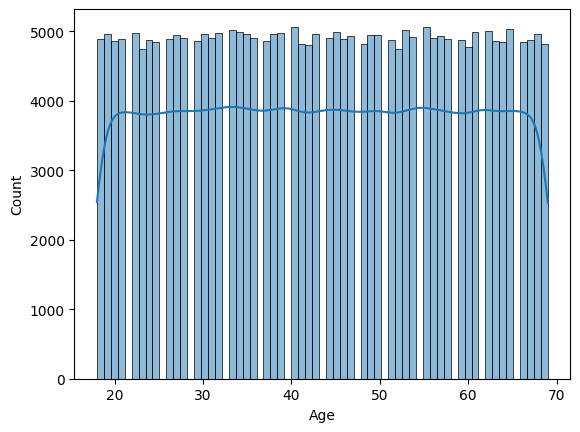

In [149]:
sns.histplot(data=df, x="Age", kde=True)
plt.show()

In [150]:
for cols in categ_cols_df:
    print('-'*25, cols, '-'*25)
    print(df[cols].value_counts())

------------------------- Education -------------------------
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
------------------------- EmploymentType -------------------------
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
------------------------- MaritalStatus -------------------------
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
------------------------- HasMortgage -------------------------
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
------------------------- HasDependents -------------------------
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
------------------------- LoanPurpose -------------------------
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int

# Label Encoding

In [151]:
df["Education"]= df["Education"].map({"High School":0, "Bachelor's":1, "Master's":2, "PhD":3})
df["EmploymentType"]= df["EmploymentType"].map({"Unemployed":0, "Part-time":1, "Full-time":2, "Self-employed":3})
df["HasMortgage"]= df["HasMortgage"].map({"No":0, "Yes":1})
df["HasDependents"]= df["HasDependents"].map({"No":0, "Yes":1})
df["HasCoSigner"]= df["HasCoSigner"].map({"No":0, "Yes":1})

In [152]:
df.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,2,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,2,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,0,Divorced,1,1,Auto,0,1


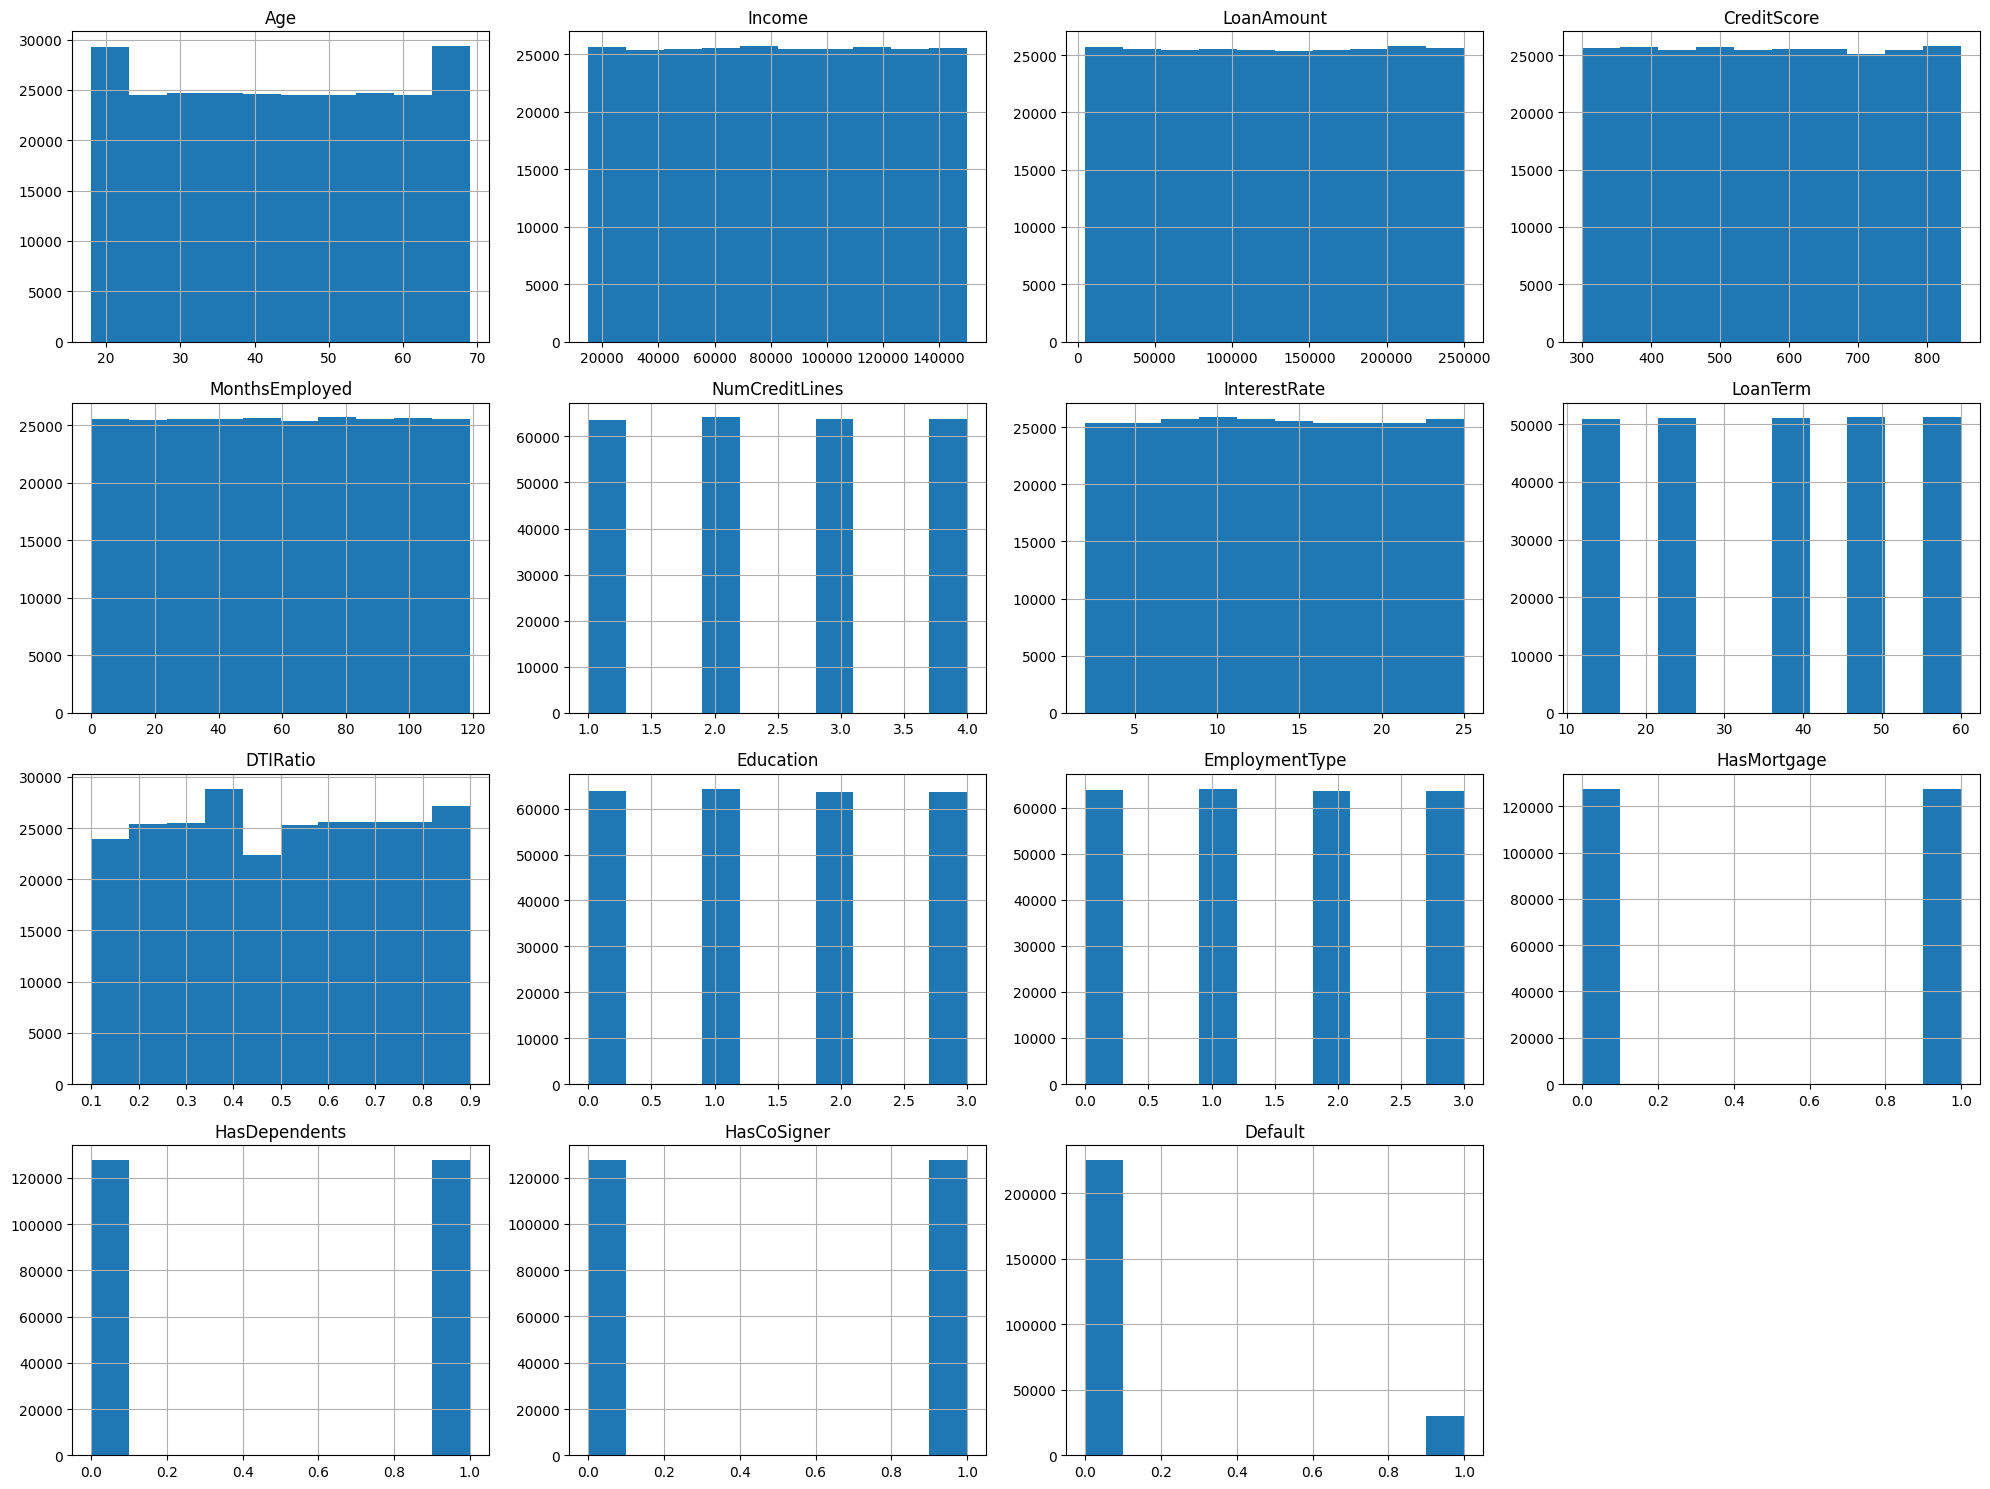

In [153]:
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

# One Hot Encoding

In [154]:
df= pd.get_dummies(df, drop_first=True)
df= df.astype(int)
print("df one hot encoded shape", df.shape)
df.head()

df one hot encoded shape (255347, 21)


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,HasMortgage,HasDependents,HasCoSigner,Default,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15,36,0,1,2,1,1,1,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4,60,0,2,2,0,0,1,0,1,0,0,0,0,1
2,46,84208,129188,451,26,3,21,24,0,2,0,1,1,0,1,0,0,0,0,0,0
3,32,31713,44799,743,0,3,7,24,0,0,2,0,0,0,0,1,0,1,0,0,0
4,60,20437,9139,633,8,4,6,48,0,1,0,0,1,0,0,0,0,0,0,0,0


# Resampling
Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. These terms are used both in statistical sampling, survey design methodology and in machine learning. Oversampling and undersampling are opposite and roughly equivalent techniques
- We are going to use Over Sampling.
- We will not use Under Sampling to avoid data loss.

In [155]:
X_one= df.drop(columns=["Default"])
y_one= df["Default"]

In [156]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y_one))
rus = RandomOverSampler(random_state = 42)
X_over, y_over = rus.fit_resample(X_one,y_one)
print(Counter(y_over))

Counter({0: 225694, 1: 29653})
Counter({0: 225694, 1: 225694})


# Train Test Split

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.33, random_state=42)

In [158]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(302429, 20)
(302429,)
(148959, 20)
(148959,)


# Logistic Regression Model

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, mean_absolute_error

In [160]:
numeric_cols_df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

In [161]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
num_cols= ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
X_train[num_cols]= scaler.fit_transform(X_train[num_cols])
X_train.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,HasMortgage,HasDependents,HasCoSigner,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
442919,-0.770065,0.382104,-0.254946,-0.263483,-1.573337,1.305573,0.752623,-1.415217,0.0,1,0,0,0,1,0,0,0,0,1,0
422542,-0.770065,-0.269757,0.721629,1.384811,-0.735588,0.411790,1.055692,-0.708820,0.0,2,3,1,0,0,0,0,0,0,1,0
3385,-1.038240,1.435561,1.089407,0.032203,-0.620036,1.305573,0.146485,-0.002422,0.0,2,3,1,1,0,0,1,0,1,0,0
168888,-0.233714,1.553939,-1.532838,-0.427055,-1.313346,-0.481994,0.904158,-0.708820,0.0,0,2,0,0,1,0,0,1,0,0,0
307873,-1.038240,-1.040319,1.127554,-1.314114,-1.515561,-0.481994,1.055692,-1.415217,0.0,3,3,1,0,1,1,0,0,0,0,0


In [162]:
X_test[num_cols]= scaler.fit_transform(X_test[num_cols])
X_test.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,HasMortgage,HasDependents,HasCoSigner,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
289968,-0.167132,-1.106701,1.283958,-1.052208,-0.941312,0.414645,-1.371328,-1.412402,0.0,0,2,0,1,0,0,0,1,0,0,0
442372,0.100464,-1.525421,1.464769,0.843678,-1.374056,0.414645,0.750185,-1.412402,0.0,1,0,0,0,0,0,1,0,1,0,0
160658,-1.170616,-0.731573,0.707671,-1.115194,-1.056711,-1.377465,0.598648,-1.412402,0.0,1,0,0,0,0,1,0,0,0,1,0
97220,-1.237515,0.361558,-1.469753,-1.335646,-0.825914,1.310699,0.750185,1.413863,0.0,1,0,1,0,0,1,0,1,0,0,0
32450,0.501857,-1.439982,1.344737,-1.360840,-0.595117,1.310699,0.598648,1.413863,0.0,0,1,1,1,0,0,1,0,1,0,0


In [163]:
logreg_model= LogisticRegression()
logreg_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [164]:
y_pred= logreg_model.predict(X_test)
y_proba = logreg_model.predict_proba(X_test)[:, 1]

# Performance of the model

In [165]:
# print Accuracy
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")

# Print the classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# print roc auc score
print("roc auc score:")
print(roc_auc_score(y_test, y_proba))

MAE: 0.32
Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68     74459
           1       0.68      0.69      0.68     74500

    accuracy                           0.68    148959
   macro avg       0.68      0.68      0.68    148959
weighted avg       0.68      0.68      0.68    148959

roc auc score:
0.7448512770101577


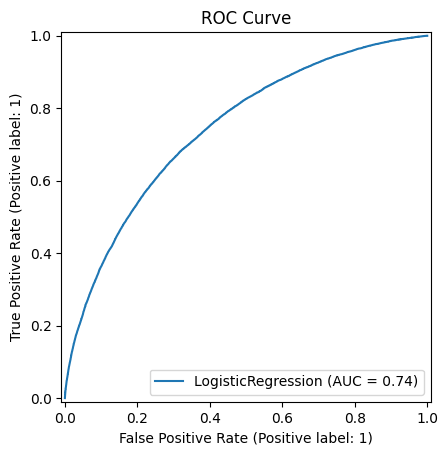

In [166]:
RocCurveDisplay.from_estimator(logreg_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

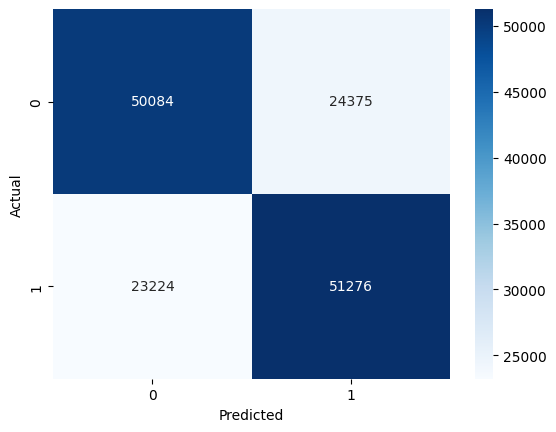

In [167]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Classifier Model

In [168]:
from sklearn.ensemble import RandomForestClassifier

rfc_model= RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rfc_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [169]:
y_pred_rfc= rfc_model.predict(X_test)
y_proba_rfc= rfc_model.predict_proba(X_test)[:, 1]

# Performance of RFC Model

Accuracy Score: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     74459
           1       0.97      1.00      0.98     74500

    accuracy                           0.98    148959
   macro avg       0.98      0.98      0.98    148959
weighted avg       0.98      0.98      0.98    148959

roc_auc_score: 0.98


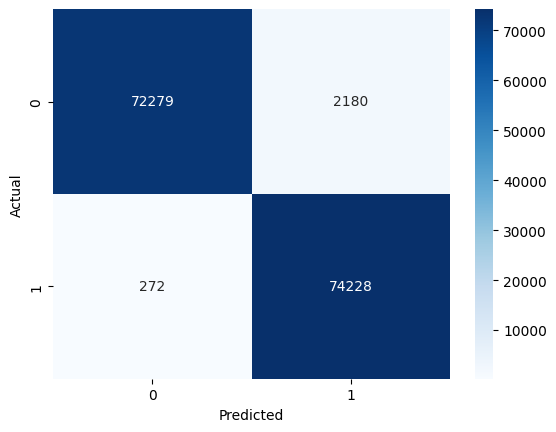

In [170]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rfc):.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))

print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_rfc):.2f}")


rfc_cm= confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc: 1.00


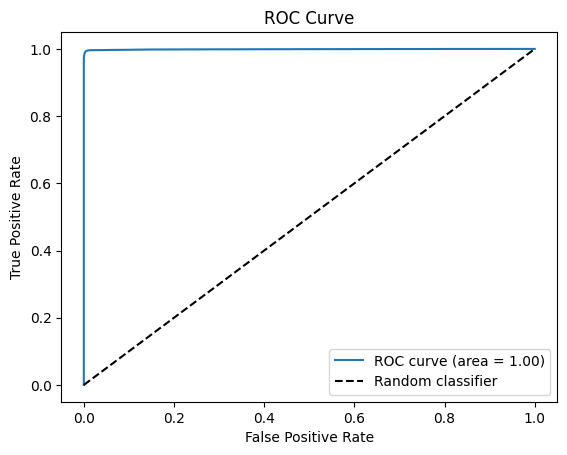

In [171]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rfc, pos_label=1)
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba_rfc)
print(f"roc_auc: {roc_auc:.2f}")
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [177]:
test_df = X_test.copy()
test_df['actual_default'] = y_test
test_df['predicted_default'] = y_pred_rfc  # Add predictions
test_df[['actual_default', 'predicted_default']].head()

,actual_default,predicted_default
289968,1,1
442372,1,1
160658,0,1
97220,1,1
32450,0,1
